In [13]:
from astropy.io import ascii
from astropy.io import fits
import matplotlib.pyplot as plt
from photutils import Background2D
from astropy.table import Column
from photutils  import detect_sources
from astropy.convolution import Gaussian2DKernel
from astropy.stats import gaussian_fwhm_to_sigma
from photutils import source_properties
from astropy.stats import sigma_clipped_stats
from photutils.datasets import make_100gaussians_image
from photutils.detection import find_peaks
import numpy as np
from astropy.visualization import simple_norm
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture
from astropy.io import fits
from random import random
import networkx as nx
import tqdm
import networkx.algorithms.community as nx_comm
import pandas as pd


### Define functions to generate networks with images:

In [14]:
#finding r0


In [96]:
def pk(r,r0):
    return np.exp(-r/r0)

def sep(x1,y1,x2,y2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2)

def network_generator_cerebellum(path,r0=24,show=False):
    im=fits.open(path)[0]
    if show: plt.imshow(im.data,cmap='Greys_r',origin='lower')
    mean, median, std = sigma_clipped_stats(im.data, sigma=3.0)
    threshold = median + (3* std)
    tbl = find_peaks(im.data, threshold, box_size=10)
    tbl['peak_value'].info.format = '%.8g'
    print(len(tbl))
    N=len(tbl)
    #A=np.zeros([N,N])
    G = nx.Graph()
    for i in tqdm.tqdm(range(N)):
        for j in range(N):
            if i>j:
                r=sep(tbl['x_peak'][i],tbl['y_peak'][i],tbl['x_peak'][j],tbl['y_peak'][j])
                if pk(r,r0)>random():
                    G.add_edge(i,j)
                    
    return G


def network_generator_galaxy(path,r0=28.8,show=False):
    im=fits.open(path)[0]
    if show: plt.imshow(im.data[0],cmap='Greys_r',origin='lower')
    mean, median, std = sigma_clipped_stats(im.data[0], sigma=3.0)
    threshold = 2.5*median + (5*std)
    tbl = find_peaks(im.data[0], threshold, box_size=10)
    tbl['peak_value'].info.format = '%.8g'
    print(len(tbl))
    N=len(tbl)
    #A=np.zeros([N,N])
    G = nx.Graph()
    for i in tqdm.tqdm(range(N)):
        for j in range(N):
            if i>j:
                r=sep(tbl['x_peak'][i],tbl['y_peak'][i],tbl['x_peak'][j],tbl['y_peak'][j])
                if pk(r,r0)>random():
                    G.add_edge(i,j)
    return G

def network_generator_cortex(path,r0=24,show=False):
    im=fits.open(path)[0]
    if show: plt.imshow(im.data,cmap='Greys_r',origin='lower')
    mean, median, std = sigma_clipped_stats(im.data, sigma=3.0)
    threshold = median + (5* std)
    tbl = find_peaks(im.data, threshold, box_size=10)
    tbl['peak_value'].info.format = '%.8g'
    print(len(tbl))
    N=len(tbl)
    #A=np.zeros([N,N])
    G = nx.Graph()
    for i in tqdm.tqdm(range(N)):
        for j in range(N):
            if i>j:
                r=sep(tbl['x_peak'][i],tbl['y_peak'][i],tbl['x_peak'][j],tbl['y_peak'][j])
                if pk(r,r0)>random():
                    G.add_edge(i,j)
                    
    return G


### Define clasic analysis function which its out put is :
* Average Shortest Path
* Clustering Coefficient
* Modularity
* Diameter
 And a function for entropy

In [62]:
def classical_analysis(G_list):
    avg_shortest_path=[]
    avg_clustering=[]
    modularity = []
    diameter = []
    sigma = []
    for i in tqdm.tqdm(range(len(G_list))):
        avg_shortest_path.append(nx.average_shortest_path_length(G_list[i]))#G0))
        avg_clustering.append(nx.average_clustering(G_list[i]))
        partition = nx.algorithms.community.greedy_modularity_communities(G_list[i])
        modularity.append(nx_comm.modularity(G_list[i],partition))
        diameter.append(nx.diameter(G_list[i]))
        #sigma.append(nx.omega(G_list[i]))
        
    return  [avg_shortest_path, avg_clustering, modularity, diameter, sigma]

def entropy(G_list):
    S = []
    for i in tqdm.tqdm(range(len(G_list))):
        G = G_list[i].copy()
        N = len(G.nodes())
        #print(N)
        Ls = np.array(sorted(nx.linalg.spectrum.laplacian_spectrum(G_list[i])))
        #taus = np.geomspace(10**-1/Ls[-1],100/Ls[1])
        taus = np.geomspace(10**-2,10**6)
        s = []
        for tau in taus:
            p = np.exp(-tau*Ls)
            z = np.sum(p)
            p = p/z
            p = np.delete(p,np.where(p<10**-8))
            s.append(-np.sum(p*np.log(p))/np.log(N))
        S.append(s)
    S = np.array(S)
    return np.mean(S,axis=0), np.var(S,axis=0),taus

### Obtain all the parameters which we need for comparison of these networks:

3992


100%|██████████| 3992/3992 [02:56<00:00, 22.63it/s]


0  G_Galaxy generated
3992


100%|██████████| 3992/3992 [02:13<00:00, 29.91it/s]


1  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:58<00:00, 33.70it/s] 


2  G_Galaxy generated
3992


100%|██████████| 3992/3992 [02:00<00:00, 33.21it/s]


3  G_Galaxy generated
3992


100%|██████████| 3992/3992 [02:12<00:00, 30.17it/s]


4  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:48<00:00, 36.71it/s] 


5  G_Galaxy generated
3992


100%|██████████| 3992/3992 [02:10<00:00, 30.65it/s] 


6  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:31<00:00, 43.81it/s]


7  G_Galaxy generated
3992


100%|██████████| 3992/3992 [02:18<00:00, 28.93it/s] 


8  G_Galaxy generated
3992


100%|██████████| 3992/3992 [02:13<00:00, 29.99it/s] 


9  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:54<00:00, 34.87it/s]


10  G_Galaxy generated
3992


100%|██████████| 3992/3992 [02:02<00:00, 32.57it/s] 


11  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:48<00:00, 36.74it/s]


12  G_Galaxy generated
3992


100%|██████████| 3992/3992 [02:10<00:00, 30.51it/s]


13  G_Galaxy generated
3992


100%|██████████| 3992/3992 [02:02<00:00, 32.61it/s]


14  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:54<00:00, 34.77it/s] 


15  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:36<00:00, 41.52it/s] 


16  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:51<00:00, 35.71it/s] 


17  G_Galaxy generated
3992


100%|██████████| 3992/3992 [02:00<00:00, 33.00it/s]


18  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:59<00:00, 33.49it/s]


19  G_Galaxy generated
3992


100%|██████████| 3992/3992 [02:08<00:00, 31.09it/s] 


20  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:35<00:00, 41.75it/s] 


21  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:31<00:00, 43.55it/s] 


22  G_Galaxy generated
3992


100%|██████████| 3992/3992 [02:07<00:00, 31.40it/s] 


23  G_Galaxy generated
3992


100%|██████████| 3992/3992 [04:08<00:00, 16.04it/s]


24  G_Galaxy generated
3992


100%|██████████| 3992/3992 [03:52<00:00, 17.20it/s]


25  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:36<00:00, 41.28it/s] 


26  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:19<00:00, 49.98it/s] 


27  G_Galaxy generated
3992


100%|██████████| 3992/3992 [02:41<00:00, 24.73it/s] 


28  G_Galaxy generated
3992


100%|██████████| 3992/3992 [03:05<00:00, 21.56it/s] 


29  G_Galaxy generated


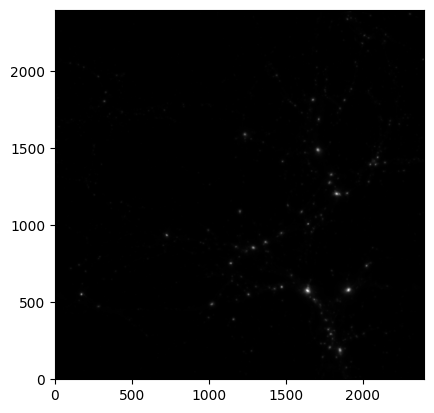

In [28]:
G_Galaxy = []
for i in range(30):
    G = network_generator_galaxy("map_gasDMD_188_1024_X_C.fits",show=True)
    G_Galaxy.append(G)
    print(i,' G_Galaxy generated')

2492


100%|██████████| 2492/2492 [00:26<00:00, 93.42it/s] 


0  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:28<00:00, 87.42it/s] 


1  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:28<00:00, 87.60it/s] 


2  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:28<00:00, 86.12it/s] 


3  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:26<00:00, 93.85it/s] 


4  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:27<00:00, 92.15it/s] 


5  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:28<00:00, 86.16it/s] 


6  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:26<00:00, 92.31it/s] 


7  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:28<00:00, 88.60it/s] 


8  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:29<00:00, 85.66it/s] 


9  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:28<00:00, 88.67it/s] 


10  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:31<00:00, 80.31it/s] 


11  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:27<00:00, 90.30it/s] 


12  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:27<00:00, 91.42it/s] 


13  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:32<00:00, 76.95it/s] 


14  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:29<00:00, 84.30it/s] 


15  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:28<00:00, 86.10it/s] 


16  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:29<00:00, 83.63it/s] 


17  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:30<00:00, 80.41it/s] 


18  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:29<00:00, 85.14it/s] 


19  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:27<00:00, 90.18it/s] 


20  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:29<00:00, 85.00it/s] 


21  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:27<00:00, 90.49it/s] 


22  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:26<00:00, 92.77it/s] 


23  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:30<00:00, 80.74it/s] 


24  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:30<00:00, 80.47it/s] 


25  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:30<00:00, 81.63it/s] 


26  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:28<00:00, 87.13it/s] 


27  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:32<00:00, 77.38it/s] 


28  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:30<00:00, 80.63it/s] 


29  G_CEREBELLUM generated


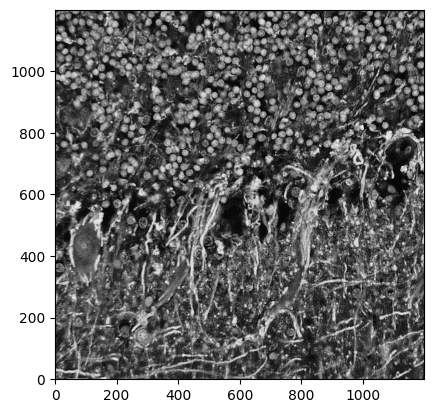

In [97]:
G_CEREBELLUM = []
for i in range(30):
    G = network_generator_cerebellum("CEREBELLUM40.fits",show=True)
    G_CEREBELLUM.append(G)
    print(i,' G_CEREBELLUM generated')

1560


100%|██████████| 1560/1560 [00:10<00:00, 151.68it/s]


0 G_cortex generated
1560


100%|██████████| 1560/1560 [00:11<00:00, 136.81it/s]


1 G_cortex generated
1560


100%|██████████| 1560/1560 [00:10<00:00, 154.26it/s]


2 G_cortex generated
1560


100%|██████████| 1560/1560 [00:10<00:00, 151.83it/s]


3 G_cortex generated
1560


100%|██████████| 1560/1560 [00:10<00:00, 143.31it/s]


4 G_cortex generated
1560


100%|██████████| 1560/1560 [00:11<00:00, 131.02it/s]


5 G_cortex generated
1560


100%|██████████| 1560/1560 [00:11<00:00, 141.81it/s]


6 G_cortex generated
1560


100%|██████████| 1560/1560 [00:11<00:00, 140.49it/s]


7 G_cortex generated
1560


100%|██████████| 1560/1560 [00:10<00:00, 147.12it/s]


8 G_cortex generated
1560


100%|██████████| 1560/1560 [00:09<00:00, 158.49it/s]


9 G_cortex generated
1560


100%|██████████| 1560/1560 [00:10<00:00, 145.09it/s]


10 G_cortex generated
1560


100%|██████████| 1560/1560 [00:10<00:00, 145.61it/s]


11 G_cortex generated
1560


100%|██████████| 1560/1560 [00:10<00:00, 143.73it/s]


12 G_cortex generated
1560


100%|██████████| 1560/1560 [00:11<00:00, 140.18it/s]


13 G_cortex generated
1560


100%|██████████| 1560/1560 [00:11<00:00, 139.23it/s]


14 G_cortex generated
1560


100%|██████████| 1560/1560 [00:10<00:00, 147.46it/s]


15 G_cortex generated
1560


100%|██████████| 1560/1560 [00:10<00:00, 143.85it/s]


16 G_cortex generated
1560


100%|██████████| 1560/1560 [00:10<00:00, 145.75it/s]


17 G_cortex generated
1560


100%|██████████| 1560/1560 [00:10<00:00, 143.30it/s]


18 G_cortex generated
1560


100%|██████████| 1560/1560 [00:11<00:00, 133.60it/s]


19 G_cortex generated
1560


100%|██████████| 1560/1560 [00:10<00:00, 152.23it/s]


20 G_cortex generated
1560


100%|██████████| 1560/1560 [00:11<00:00, 141.20it/s]


21 G_cortex generated
1560


100%|██████████| 1560/1560 [00:10<00:00, 145.04it/s]


22 G_cortex generated
1560


100%|██████████| 1560/1560 [00:10<00:00, 148.05it/s]


23 G_cortex generated
1560


100%|██████████| 1560/1560 [00:10<00:00, 145.79it/s]


24 G_cortex generated
1560


100%|██████████| 1560/1560 [00:10<00:00, 144.68it/s]


25 G_cortex generated
1560


100%|██████████| 1560/1560 [00:10<00:00, 144.36it/s]


26 G_cortex generated
1560


100%|██████████| 1560/1560 [00:10<00:00, 147.84it/s]


27 G_cortex generated
1560


100%|██████████| 1560/1560 [00:11<00:00, 140.37it/s]


28 G_cortex generated
1560


100%|██████████| 1560/1560 [00:11<00:00, 136.00it/s]


29 G_cortex generated


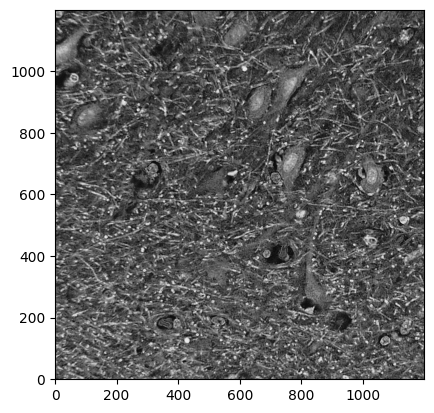

In [98]:
G_cortex = []
for i in range(30):
    G = network_generator_cortex("CORTEX40.fits",show=True)
    G_cortex.append(G)
    print(i,'G_cortex generated')

In [99]:
for i in tqdm.tqdm(range(len(G_cortex))):
        Gcc = sorted(nx.connected_components(G_cortex[i]), key=len, reverse=True)
        G_cortex[i] = G_cortex[i].subgraph(Gcc[0]).copy()

100%|██████████| 30/30 [00:00<00:00, 34.52it/s]


In [100]:
for i in tqdm.tqdm(range(len(G_CEREBELLUM))):
        Gcc = sorted(nx.connected_components(G_CEREBELLUM[i]), key=len, reverse=True)
        G_CEREBELLUM[i] = G_CEREBELLUM[i].subgraph(Gcc[0]).copy()

100%|██████████| 30/30 [00:02<00:00, 12.60it/s]


In [34]:
for i in tqdm.tqdm(range(len(G_Galaxy))):
        Gcc = sorted(nx.connected_components(G_Galaxy[i]), key=len, reverse=True)
        G_Galaxy[i] = G_Galaxy[i].subgraph(Gcc[0]).copy()

100%|██████████| 30/30 [00:02<00:00, 11.60it/s]


In [101]:
results_cortex = classical_analysis(G_cortex)    

100%|██████████| 30/30 [03:50<00:00,  7.68s/it]


In [102]:
results_cerebellum = classical_analysis(G_CEREBELLUM)    

100%|██████████| 30/30 [11:47<00:00, 23.58s/it]


In [68]:
results_galaxy = classical_analysis(G_Galaxy)    

100%|██████████| 30/30 [25:19<00:00, 50.66s/it]


### saving resualts:

In [158]:
df_cortex = pd.DataFrame({'avg_shortest_path': np.array(results_cortex[0],dtype=float),
                   'avg_clustering': np.array(results_cortex[1],dtype=float),
                   'modularity': np.array(results_cortex[2],dtype=float),
                  'diameter': np.array(results_cortex[3],dtype=float) })

df_cerebellum= pd.DataFrame({'avg_shortest_path': np.array(results_cerebellum[0],dtype=float),
                   'avg_clustering': np.array(results_cerebellum[1],dtype=float),
                   'modularity': np.array(results_cerebellum[2],dtype=float),
                  'diameter': np.array(results_cerebellum[3],dtype=float) })

df_galaxy = pd.DataFrame({'avg_shortest_path': np.array(results_galaxy[0],dtype=float),
                   'avg_clustering': np.array(results_galaxy[1],dtype=float),
                   'modularity': np.array(results_galaxy[2],dtype=float),
                  'diameter': np.array(results_galaxy[3],dtype=float) })

df_cortex.to_csv("results_cortex.csv")
df_cerebellum.to_csv("results_cerebellum.csv")
df_galaxy.to_csv("results_galaxy.csv")

Plot the histogram of parameters of all the ensembles in each network:

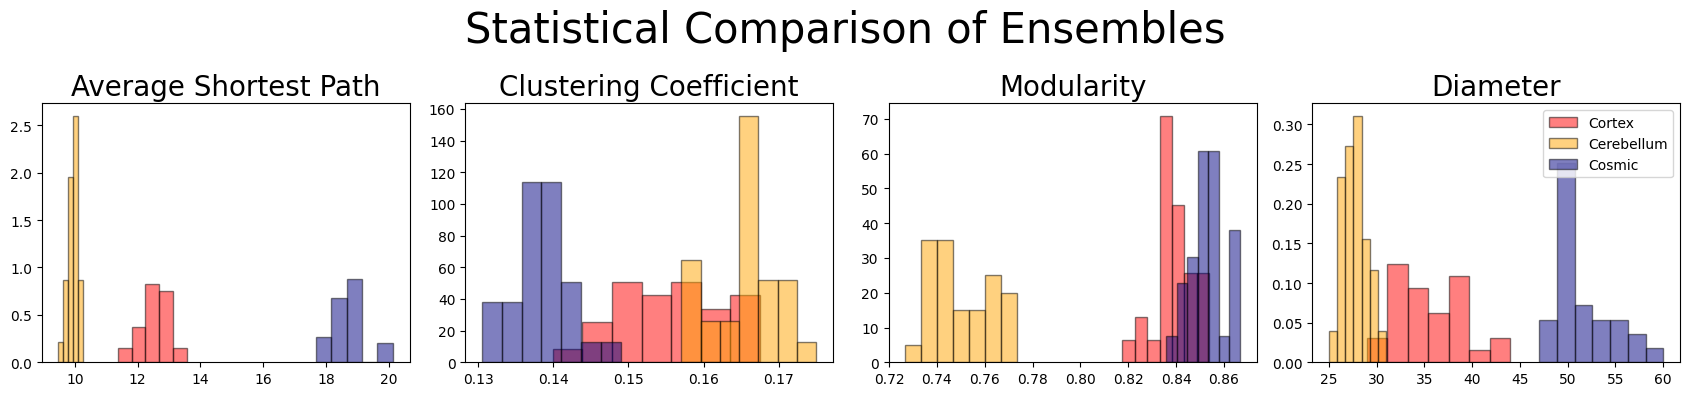

In [179]:
plt.figure(figsize=[17,4],layout='tight')
plt.suptitle('Statistical Comparison of Ensembles',fontsize=30)

colors = {'cortex': 'red', 'galaxy':'navy','cerebellum':'orange'}

plt.subplot(1,4,1)
plt.title('Average Shortest Path',fontsize=20)
plt.hist(results_cortex[0],bins=5, density = True, alpha=0.5,edgecolor='black',label='Cortex',color=colors['cortex'])
plt.hist(results_cerebellum[0],bins=5, density = True, alpha=0.5,edgecolor='black',label='Cerebellum',color=colors['cerebellum'])
plt.hist(results_galaxy[0],bins=5, density = True, alpha=0.5,edgecolor='black',label='Cosmic',color=colors['galaxy'])
#plt.hist(results_cerebelum[0])
#plt.hist(results_darkgalaxy[0])
#plt.hist(results_galaxy[0])

b=7

plt.subplot(1,4,2)
plt.title('Clustering Coefficient',fontsize=20)
plt.hist(results_cortex[1],bins=b, density = True, alpha=0.5,edgecolor='black',label='Cortex',color=colors['cortex'])
plt.hist(results_cerebellum[1],bins=b, density = True, alpha=0.5,edgecolor='black',label='Cerebellum',color=colors['cerebellum'])
plt.hist(results_galaxy[1],bins=b, density = True, alpha=0.5,edgecolor='black',label='Cosmic',color=colors['galaxy'])

plt.subplot(1,4,3)
plt.title('Modularity',fontsize=20)
plt.hist(results_cortex[2],bins=b, density = True, alpha=0.5,edgecolor='black',label='Cortex',color=colors['cortex'])
plt.hist(results_cerebellum[2],bins=b, density = True, alpha=0.5,edgecolor='black',label='cerebellum',color=colors['cerebellum'])
plt.hist(results_galaxy[2],bins=b, density = True, alpha=0.5,edgecolor='black',label='Cosmic',color=colors['galaxy'])

plt.subplot(1,4,4)
plt.title('Diameter',fontsize=20)
plt.hist(results_cortex[3],bins=b, density = True, alpha=0.5,edgecolor='black',label='Cortex',color=colors['cortex'])
plt.hist(results_cerebellum[3],bins=b, density = True, alpha=0.5,edgecolor='black',label='Cerebellum',color=colors['cerebellum'])
plt.hist(results_galaxy[3],bins=b, density = True, alpha=0.5,edgecolor='black',label='Cosmic',color=colors['galaxy'])

#plt.subplot(1,5,5)
#plt.title('Small-Worldness',fontsize=20)
#plt.hist(results_cortex[0],bins=10, alpha=0.5,edgecolor='black',label='Cortex',color=colors['cortex'])


plt.legend()

In [104]:
entropy_cortex, entropy_var_cortex, taus_cortex = entropy(G_cortex)

100%|██████████| 30/30 [00:22<00:00,  1.32it/s]


In [105]:
entropy_cerebellum, entropy_var_cerebellum, taus_cerebellum= entropy(G_CEREBELLUM)

100%|██████████| 30/30 [01:12<00:00,  2.41s/it]


In [65]:
entropy_galaxy, entropy_var_galaxy, taus_galaxy = entropy(G_Galaxy)

100%|██████████| 30/30 [02:49<00:00,  5.66s/it]


### saving resualts:

In [194]:
df_cortex = pd.DataFrame({'entropy': np.array(entropy_cortex,dtype=float),
                   'entropy_var': np.array(entropy_var_cortex,dtype=float),
                   'taus': np.array(taus_cortex,dtype=float)})

df_cerebellum= pd.DataFrame({'entropy': np.array(entropy_cerebellum,dtype=float),
                   'entropy_var': np.array(entropy_var_cerebellum,dtype=float),
                   'taus': np.array(taus_cerebellum,dtype=float)})

df_galaxy = pd.DataFrame({'entropy': np.array(entropy_galaxy,dtype=float),
                   'entropy_var': np.array(entropy_var_galaxy,dtype=float),
                   'taus': np.array(taus_galaxy,dtype=float)})

df_cortex.to_csv("entropy_cortex.csv")
df_cerebellum.to_csv("entropy_cerebellum.csv")
df_galaxy.to_csv("entropy_galaxy.csv")

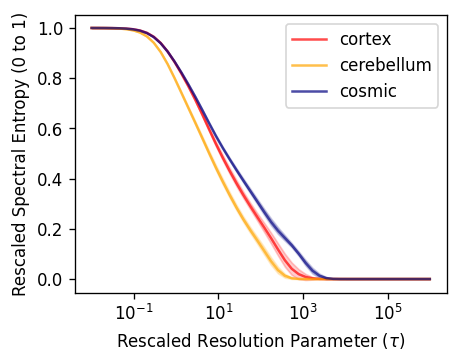

In [180]:
colors = {'cortex': 'red', 'galaxy':'navy','cerebellum':'orange'}
plt.figure(figsize=[4,3],dpi=120)
#cortex
y = entropy_cortex; error=np.sqrt(entropy_var_cortex) ; x = taus_cortex
plt.plot(x, y,label='cortex',alpha=0.7,color=colors['cortex'])
plt.fill_between(x, y-error, y+error,alpha=0.2,color=colors['cortex'])
#cerebellum
y = entropy_cerebellum; error=np.sqrt(entropy_var_cerebellum) ; x = taus_cerebellum
plt.plot(x, y,label='cerebellum',alpha=0.7,color=colors['cerebellum'])
plt.fill_between(x, y-error, y+error,alpha=0.2,color=colors['cerebellum'])
#cosmic
y = entropy_galaxy; error=np.sqrt(entropy_var_galaxy) ; x = taus_galaxy
plt.plot(x, y,label='cosmic',alpha=0.7,color=colors['galaxy'])
plt.fill_between(x, y-error, y+error,alpha=0.2,color=colors['galaxy'])
plt.ylabel('Rescaled Spectral Entropy (0 to 1)')
plt.xlabel('Rescaled Resolution Parameter ' + r'$(\tau)$')
plt.xscale('log')

plt.legend()

In [91]:
len(list(G_cortex[2].nodes()))

42

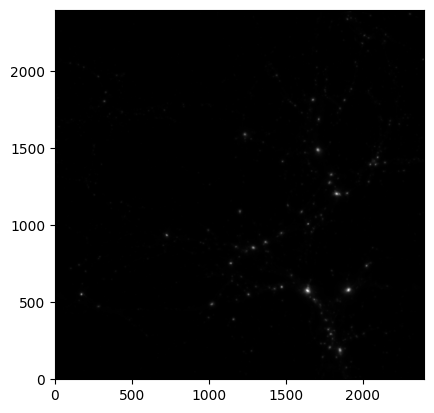

In [109]:
#load the image
im=fits.open('map_gasDMD_188_1024_X_C.fits')[0]

plt.imshow(im.data[0],cmap='Greys_r',origin='lower')

In [94]:
L=np.shape(im.data[0])[0]
L

1200

In [95]:
#cosmic
ps=1600/L
16/ps

12.0

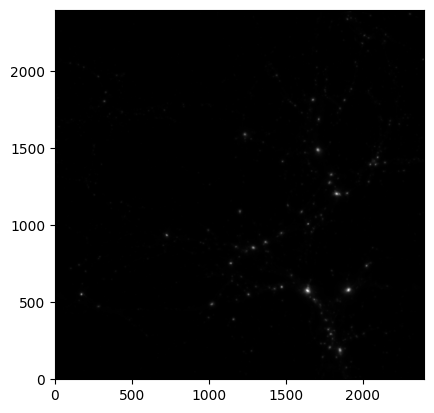

In [209]:
im=fits.open('C.fits')[0]
plt.imshow(im.data[0],cmap='Greys_r',origin='lower')

## Finding peaks

In [110]:
from astropy.stats import sigma_clipped_stats
from photutils.datasets import make_100gaussians_image
from photutils.detection import find_peaks

mean, median, std = sigma_clipped_stats(im.data[0], sigma=3.0)
threshold = 2.5*median + (5*std)
tbl = find_peaks(im.data[0], threshold, box_size=10)
tbl['peak_value'].info.format = '%.8g'  # for consistent table output
print(tbl[:10])  # print only the first 10 peaks
tbl.write('peaks_cos.csv' , format='ascii', overwrite=True)

x_peak y_peak   peak_value 
------ ------ -------------
  1226      0 1.4515084e-30
  1385      0 5.3942152e-31
  1735      0 2.6165346e-30
  1914      0 2.5209957e-30
   528      1 7.3425929e-31
  1039      2 1.3617828e-30
  1690      3 2.4141419e-30
  1774      3  1.062675e-30
  1795      3 4.6278409e-31
  1886      3 5.3892527e-30


In [19]:
len(tbl)

3992

### Source detection

C:\Users\rosha\anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error in 3.6
  


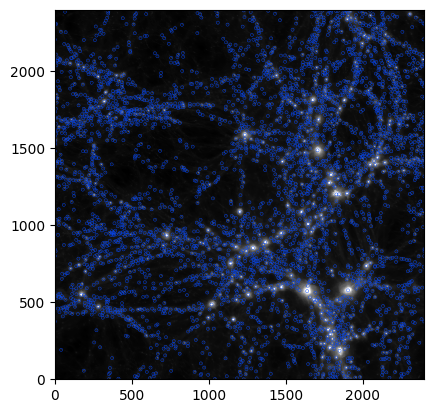

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture
positions = np.transpose((tbl['x_peak'], tbl['y_peak']))
apertures = CircularAperture(positions, r=10.)
norm = simple_norm(im.data[0], 'sqrt', percent=99.9)
plt.imshow(im.data[0], cmap='Greys_r', origin='lower', norm=norm,interpolation='nearest')
apertures.plot(color='#0547f9', lw=0.3)
plt.xlim(0, im.data[0].shape[1]-1)
plt.ylim(0, im.data[0].shape[0]-1)

plt.savefig('Peak finding_cos.pdf',dpi=1000,overwrite=True)

finding the network with probability pk(r,r0) by distance

In [24]:
from astropy.io import ascii
from astropy.io import fits
import numpy as np
from random import random
import networkx as nx
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture

r0=28.8

def pk(r,r0):
    return np.exp(-r/r0)

def sep(x1,y1,x2,y2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2)
data=ascii.read('peaks_cos.csv')
N=len(data)
A=np.zeros([N,N])

for i in tqdm.tqdm(range(N)):
    for j in range(N):
        #r=sep(data['x_peak'][i],data['y_peak'][i],data['x_peak'][j],data['y_peak'][j])
        #A[i][j]=pk(r,r0)
        if i>j:
            r=sep(data['x_peak'][i],data['y_peak'][i],data['x_peak'][j],data['y_peak'][j])
            if pk(r,r0)>random():
                A[i][j]=1
                A[j][i]=1
            #else:
            #    A[i][j]=0
        #else:
        #    A[i][j]=0

100%|██████████| 3992/3992 [01:57<00:00, 33.94it/s] 


Text(0.5, 1.0, 'Probability Dist pk')

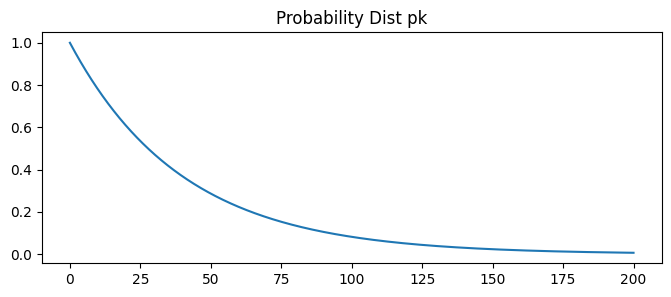

In [164]:
x=np.arange(0,200,0.001)
plt.figure(figsize=(8,3))
plt.plot(x,pk(x,40))
plt.title('Probability Dist pk')

* Plot the network on the image and save adjacency matrix

C:\Users\rosha\anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error in 3.6
C:\Users\rosha\anaconda3\envs\python37\lib\site-packages\astropy\visualization\mpl_normalize.py:164: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)


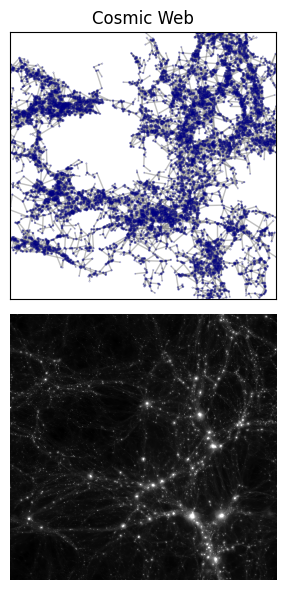

In [165]:
plt.figure(figsize=[3.5,6],layout='tight')
pos={}
for i in range(len(data)):
    pos[i]=data['x_peak'][i],data['y_peak'][i]
    
#G = nx.from_numpy_array(A)
G=G_Galaxy[0]
#im=fits.open('CEREBELLUM40.fits')[0]

plt.subplot(2,1,1)
plt.title('Cosmic Web')
d = dict(G.degree)
norm = simple_norm(np.zeros(np.shape(im.data[0])), 'sqrt', percent=99.9)
plt.imshow(im.data[0], cmap='Greys_r', origin='lower', norm=norm,interpolation='nearest')
nx.draw_networkx_nodes(G = G, pos = pos, node_color = colors['galaxy'], alpha = .5, node_size=[ (v**2) * .05 for v in d.values()])#,edgecolors='k')
nx.draw_networkx_edges(G = G, pos = pos, edge_color='gray',width=1, alpha=.5, arrows = False)

plt.subplot(2,1,2)
norm = simple_norm(im.data[0], 'sqrt', percent=99.9)
plt.imshow(im.data[0], cmap='Greys_r', origin='lower', norm=norm,interpolation='nearest')
plt.axis('off')
plt.ylabel('Image')

plt.savefig('r=28.8 cosmic.pdf',dpi=1000,overwrite=True)
# save the matrix

hdu=fits.PrimaryHDU(A)
hdul = fits.HDUList([hdu])
#hdul.writeto('Adj_Matrix_Peaks_r=40.fits',overwrite=True)

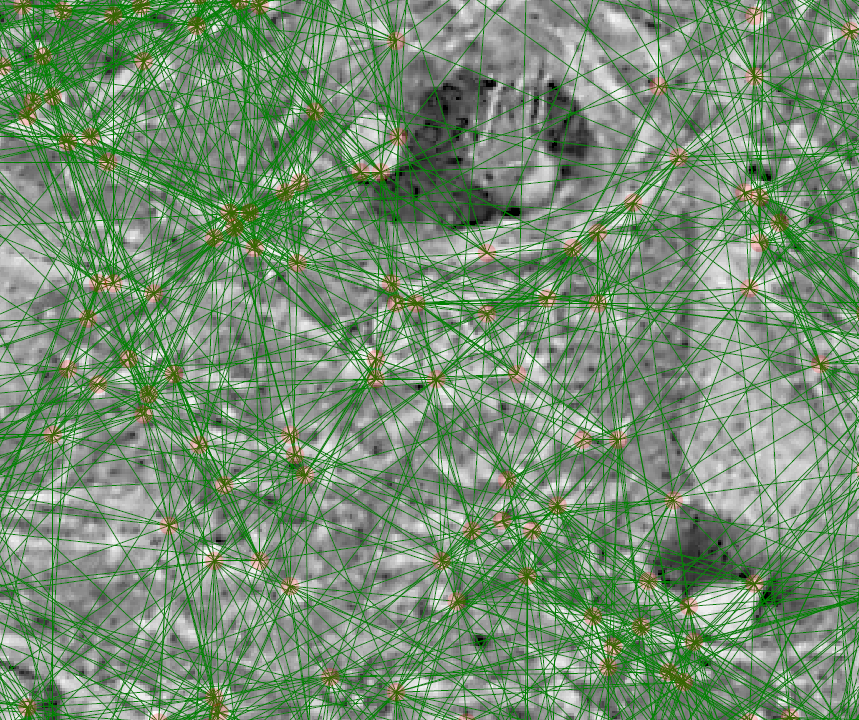

In [28]:
from IPython.display import Image

fig = Image(filename=('green.png'),width=400)
fig

x_peak y_peak peak_value
------ ------ ----------
    58      1  19.734795
   950      1  23.248022
    88      3  17.002285
   248      3  17.783003
  1180      3  18.910704
   342      5  19.344437
   376      5  21.122736
   654      5  20.428766
   938      5  21.122736
   358      7  17.522762


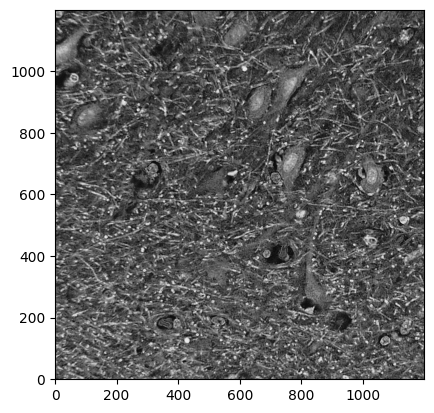

In [173]:
im=fits.open('CORTEX40.fits')[0]
plt.imshow(im.data,cmap='Greys_r',origin='lower')
from astropy.stats import sigma_clipped_stats
from photutils.datasets import make_100gaussians_image
from photutils.detection import find_peaks

mean, median, std = sigma_clipped_stats(im.data, sigma=3.0)
threshold = median + (5* std)
tbl = find_peaks(im.data, threshold, box_size=10)
tbl['peak_value'].info.format = '%.8g'  # for consistent table output
print(tbl[:10])  # print only the first 10 peaks
tbl.write('peaks_cor.csv' , format='ascii', overwrite=True)

C:\Users\rosha\anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error in 3.6
C:\Users\rosha\anaconda3\envs\python37\lib\site-packages\astropy\visualization\mpl_normalize.py:164: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
C:\Users\rosha\anaconda3\envs\python37\lib\site-packages\astropy\visualization\mpl_normalize.py:164: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)


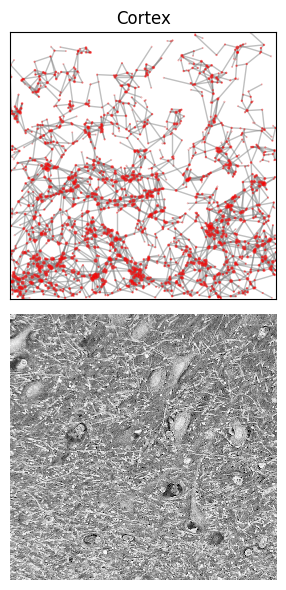

In [174]:
data=ascii.read('peaks_cor.csv')
plt.figure(figsize=[3.5,6],layout='tight')
pos={}
for i in range(len(data)):
    pos[i]=data['x_peak'][i],data['y_peak'][i]
    
#G = nx.from_numpy_array(A)
G=G_cortex[0]
#im=fits.open('CEREBELLUM40.fits')[0]

plt.subplot(2,1,1)
plt.title('Cortex')
d = dict(G.degree)
norm = simple_norm(np.zeros(np.shape(im.data)), 'sqrt', percent=99.9)
plt.imshow(im.data, cmap='Greys_r', origin='lower', norm=norm,interpolation='nearest')
nx.draw_networkx_nodes(G = G, pos = pos, node_color = colors['cortex'], alpha = .5, node_size=[ (v**2) * .05 for v in d.values()])#,edgecolors='k')
nx.draw_networkx_edges(G = G, pos = pos, edge_color='gray',width=1, alpha=.5, arrows = False)

plt.subplot(2,1,2)
norm = simple_norm(im.data, 'sqrt', percent=99.9)
plt.imshow(im.data, cmap='Greys_r', origin='lower', norm=norm,interpolation='nearest')
plt.axis('off')
plt.ylabel('Image')

plt.savefig('r=24 cortex.pdf',dpi=1000,overwrite=True)
# save the matrix

# hdu=fits.PrimaryHDU(A)
# hdul = fits.HDUList([hdu])
# #hdul.writeto('Adj_Matrix_Peaks_r=40.fits',overwrite=True)

x_peak y_peak peak_value
------ ------ ----------
   162      1   14.40993
   552      1  13.378483
   746      1  11.740302
   778      1  13.196464
   790      1  14.349257
   864      1  12.377372
  1096      1  14.015553
   154      3  14.106565
   298      3  11.800975
   586      3  12.043668


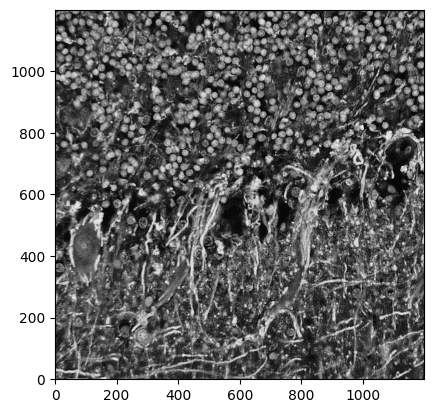

In [175]:
im=fits.open('CEREBELLUM40.fits')[0]
plt.imshow(im.data,cmap='Greys_r',origin='lower')
from astropy.stats import sigma_clipped_stats
from photutils.datasets import make_100gaussians_image
from photutils.detection import find_peaks

mean, median, std = sigma_clipped_stats(im.data, sigma=3.0)
threshold = median + (3* std)
tbl = find_peaks(im.data, threshold, box_size=10)
tbl['peak_value'].info.format = '%.8g'  # for consistent table output
print(tbl[:10])  # print only the first 10 peaks
tbl.write('peaks_cel.csv' , format='ascii', overwrite=True)

C:\Users\rosha\anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error in 3.6
C:\Users\rosha\anaconda3\envs\python37\lib\site-packages\astropy\visualization\mpl_normalize.py:164: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
C:\Users\rosha\anaconda3\envs\python37\lib\site-packages\astropy\visualization\mpl_normalize.py:164: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)


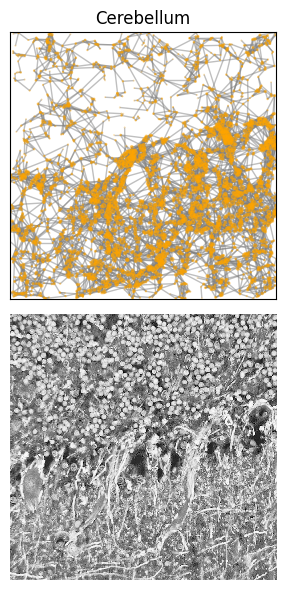

In [177]:
data=ascii.read('peaks_cel.csv')
plt.figure(figsize=[3.5,6],layout='tight')
pos={}
for i in range(len(data)):
    pos[i]=data['x_peak'][i],data['y_peak'][i]
    
#G = nx.from_numpy_array(A)
G=G_CEREBELLUM[0]
#im=fits.open('CEREBELLUM40.fits')[0]

plt.subplot(2,1,1)
plt.title('Cerebellum')
d = dict(G.degree)
norm = simple_norm(np.zeros(np.shape(im.data)), 'sqrt', percent=99.9)
plt.imshow(im.data, cmap='Greys_r', origin='lower', norm=norm,interpolation='nearest')
nx.draw_networkx_nodes(G = G, pos = pos, node_color = colors['cerebellum'], alpha = .5, node_size=[ (v**2) * .05 for v in d.values()])#,edgecolors='k')
nx.draw_networkx_edges(G = G, pos = pos, edge_color='gray',width=1, alpha=.5, arrows = False)

plt.subplot(2,1,2)
norm = simple_norm(im.data, 'sqrt', percent=99.9)
plt.imshow(im.data, cmap='Greys_r', origin='lower', norm=norm,interpolation='nearest')
plt.axis('off')
plt.ylabel('Image')

plt.savefig('r=24 cel.pdf',dpi=1000,overwrite=True)
# save the matrix

# hdu=fits.PrimaryHDU(A)
# hdul = fits.HDUList([hdu])
# #hdul.writeto('Adj_Matrix_Peaks_r=40.fits',overwrite=True)